# Convolutional Neural Networks -  Keras

Keras was developed to enable deep learning engineers to build and experiment with different models very quickly. Just as TensorFlow is a higher-level framework than Python, Keras is an even higher-level framework and provides additional abstractions. Being able to go from idea to result with the least possible delay is key to finding good models. However, Keras is more restrictive than the lower-level frameworks, so there are some very complex models that you can implement in TensorFlow but not (without more difficulty) in Keras. That being said, Keras will work fine for many common models. 

### Network Architecture
Layer (type),                 Output Shape,              Param # 

input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 32, 32, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 30, 30, 32)        9248      
_________________________________________________________________
bn1 (BatchNormalization)     (None, 30, 30, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7200)              0         
_________________________________________________________________
fc (Dense)                   (None, 1)                 7201      
_________________________________________________________________
Total params: 21,441
Trainable params: 21,313
Non-trainable params: 128

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
# import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.
/Users/Shawn/anaconda2/envs/py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


**Note**: Use them easily just by calling them directly in the notebook. Ex: `X = Input(...)` or `X = ZeroPadding2D(...)`.

## 1 - The Happy House 

pictures of your friends and yourself, taken by the front-door camera. The dataset is labbeled. 

<img src="images/house-members.png" style="width:550px;height:250px;">


In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


**Details of the "Happy" dataset**:
- Images are of shape (64,64,3)
- Training: 600 pictures
- Test: 150 pictures

## Building a ConvNet model in Keras

Other useful functions such as `AveragePooling2D()`, `GlobalMaxPooling2D()`, `Dropout()`.

[Conv2D()](https://keras.io/layers/convolutional/#conv2d),
[MaxPooling2D()](https://keras.io/layers/pooling/#maxpooling2d),
[Dense()](https://keras.io/layers/core/#dense),
[Dropout()](https://keras.io/layers/core/#dropout)

In [13]:
# GRADED FUNCTION: HappyModel

def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input placeholder as a tensor with shape input_shape.
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool0')(X)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool1')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X=Dropout(0.2)(X)
    X = Dense(1, activation='sigmoid', name='fc')(X) # 1: dimensionality of the output space.

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model

There are four steps in Keras:
1. Create the model by calling the function above
2. Compile the model by calling `model.compile(optimizer = "...", loss = "...", metrics = ["accuracy"])`
3. Train the model on train data by calling `model.fit(x = ..., y = ..., epochs = ..., batch_size = ...)`
4. Test the model on test data by calling `model.evaluate(x = ..., y = ...)`

More about `model.compile()`, `model.fit()`, `model.evaluate()` and their arguments, refer to the official [Keras documentation](https://keras.io/models/model/).


In [14]:
happyModel = HappyModel(X_train[0].shape)

In [15]:
happyModel.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [16]:
happyModel.fit(x = X_train, y = Y_train, epochs = 10, batch_size = 16)

Epoch 1/10
600/600 [==============================] - 10s 17ms/step - loss: 0.5265 - acc: 0.7433
Epoch 2/10
600/600 [==============================] - 10s 17ms/step - loss: 0.2197 - acc: 0.9150
Epoch 3/10
600/600 [==============================] - 10s 17ms/step - loss: 0.1591 - acc: 0.9400
Epoch 4/10
600/600 [==============================] - 10s 16ms/step - loss: 0.1181 - acc: 0.9600
Epoch 5/10
600/600 [==============================] - 10s 17ms/step - loss: 0.1005 - acc: 0.9683
Epoch 6/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0992 - acc: 0.9633
Epoch 7/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0970 - acc: 0.9700
Epoch 8/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0724 - acc: 0.9833
Epoch 9/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0948 - acc: 0.9633
Epoch 10/10
600/600 [==============================] - 10s 17ms/step - loss: 0.1120 - acc: 0.9667


Note that if you run `fit()` again, the `model` will continue to train with the parameters it has already learnt instead of reinitializing them.


In [17]:
preds = happyModel.evaluate(x = X_test, y = Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 8ms/step

Loss = 0.211540583372
Test Accuracy = 0.926666665872


[[ 1.]]


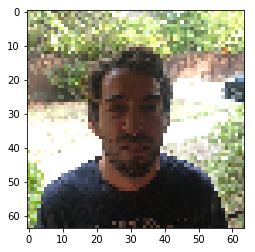

In [18]:
### START CODE HERE ###
img_path = 'images/my_image.jpg'
### END CODE HERE ###
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(happyModel.predict(x))

## Useful functions in Keras

Two other basic features of Keras that you'll find useful are:
- `model.summary()`: prints the details of your layers in a table with the sizes of its inputs/outputs
- `plot_model()`: plots your graph in a nice layout. You can even save it as ".png" using SVG() if you'd like to share it on social media ;). It is saved in "File" then "Open..." in the upper bar of the notebook.


In [19]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 32, 32, 32)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 30, 30, 32)        9248      
__________

In [12]:
# plot_model(happyModel, to_file='HappyModel.png')
# SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))